In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
# Read the pickle file
features = pd.read_pickle('./Datasets/feature_extraction.pkl')
features.head()

,sentence,emotion,doc_2_grams,doc_3_grams,token_part_of_speech,token_lemmatized,token_normalized,token_dependancy,token_sentiment
0,That game hurt.,other,[game_hurt],[],"[DET, NOUN, VERB, PUNCT]","[that, game, hurt, .]","[that, game, hurt, .]","[det, nsubj, ROOT, punct]","[0.0, -0.4, 0.0, 0.0]"
1,"You do right, if you don't care then fuck 'em!",other,"[right_care, care_fuck]",[right_care_fuck],"[PRON, VERB, ADV, PUNCT, SCONJ, PRON, AUX, PAR...","[you, do, right, ,, if, you, do, not, care, th...","[you, do, right, ,, if, you, do, not, care, th...","[nsubj, ccomp, dobj, punct, mark, nsubj, aux, ...","[0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, ..."
2,Man I love reddit.,happiness,"[man_love, love_reddit]",[man_love_reddit],"[INTJ, PRON, VERB, NOUN, PUNCT]","[man, I, love, reddit, .]","[man, i, love, reddit, .]","[intj, nsubj, ROOT, dobj, punct]","[0.0, 0.0, 0.5, 0.0, 0.0]"
3,"[NAME] was nowhere near them, he was by the Fa...",other,[near_falcon],[],"[X, NOUN, PUNCT, AUX, ADV, ADP, PRON, PUNCT, P...","[[, name, ], be, nowhere, near, they, ,, he, b...","[[, name, ], was, nowhere, near, them, ,, he, ...","[dep, dep, punct, ccomp, advmod, prep, pobj, p...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, ..."
4,Right? Considering it’s such an important docu...,happiness,"[right_consider, consider_important, important...","[right_consider_important, consider_important_...","[INTJ, PUNCT, VERB, PRON, VERB, DET, DET, ADJ,...","[right, ?, consider, it, ’, such, an, importan...","[right, ?, considering, it, 's, such, an, impo...","[ROOT, punct, csubj, nsubj, advcl, predet, det...","[0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [74]:
# Concatenate all specified columns into a single feature column
features['X'] = features['sentence'] + ' ' + \
                features['doc_2_grams'].map(lambda x: ' '.join(x)) + ' ' + \
                features['doc_3_grams'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_part_of_speech'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_lemmatized'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_normalized'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_dependancy'].map(lambda x: ' '.join(x)) + ' ' + \
                features['token_sentiment'].map(lambda x: ' '.join(map(str, x)))

# Define features and target
X = features['X']
y = features['emotion']

# Drop rows with NaN values in 'X_text' and corresponding 'y'
X.dropna(inplace=True)
y = y[X.index]

In [76]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [79]:
# Lists to store epoch and validation accuracy
epochs = []
val_accuracy = []

# Initialize Logistic Regression Classifier with max iterations and a solver function
logistic_clf = LogisticRegression(C=0.1, max_iter=100, solver='sag', penalty='l2')

best_accuracy = 0
best_model = None
patience = 5
no_improvement_count = 0

for epoch in range(100):
    # Train the classifier
    logistic_clf.fit(X_train_split, y_train_split)

    # Validate the model
    y_val_pred = logistic_clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    # Check for improvement in validation accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = logistic_clf
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    print(f"Epoch {epoch + 1}: Validation Accuracy = {accuracy:.4f}")

    # Store epoch and validation accuracy
    epochs.append(epoch + 1)
    val_accuracy.append(accuracy)

    # Check for early stopping
    if no_improvement_count >= patience:
        print(f"No improvement in validation accuracy for {patience} epochs. Early stopping...")
        break 

c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 1: Validation Accuracy = 0.9374


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 2: Validation Accuracy = 0.9374


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 3: Validation Accuracy = 0.9374


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 4: Validation Accuracy = 0.9374


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 5: Validation Accuracy = 0.9374


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 6: Validation Accuracy = 0.9374
Epoch 7: Validation Accuracy = 0.9374
No improvement in validation accuracy for 5 epochs. Early stopping...


c:\Users\neilr\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


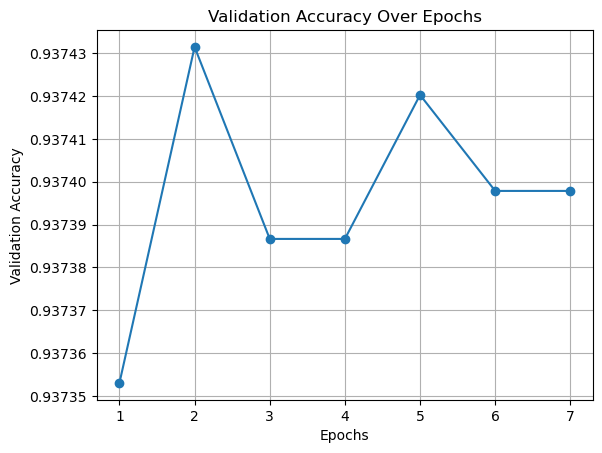

In [91]:
# Plot validation accuracy over epochs
plt.plot(epochs, val_accuracy, marker='o', linestyle='-')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [81]:
# Use the best model for evaluation
y_test_pred = best_model.predict(X_val)

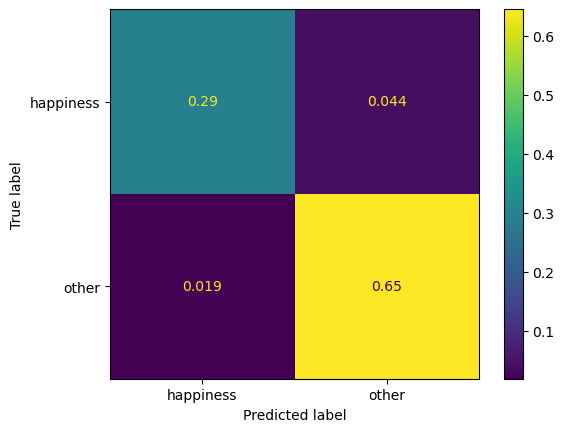

In [84]:
ConfusionMatrixDisplay.from_predictions(y_val, y_test_pred, normalize='all')

In [85]:
# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Calculate the F1 score
f1_val = f1_score(y_val, y_val_pred, average='weighted')
print("Validation F1 Score:", f1_val)

Validation Accuracy: 0.9373978460918434
Validation F1 Score: 0.9367615192486958


In [86]:
# Loading kaggle test file
file_path = "C:/Users/neilr/Documents/BUAS year 2/Block C/2023-24c-fai2-adsai-neildaniel221270/Kaggle/Datasets/test (1).csv"
test_kaggle = pd.read_csv(file_path, sep='\t')
test_kaggle.head()

,id,sentence
0,0,I get sad when I see a sick animal.
1,1,Getting punched in the face like that makes my...
2,2,I get anxious near the end of the block.
3,3,being awoken to a shadowy figure at the edge o...
4,4,I am annoyed that my brother didn't wash his d...


In [87]:
# Preprocess the text data
X_test_kaggle = test_kaggle['sentence']

# Vectorize the text data
X_test_vectorized = vectorizer.transform(X_test_kaggle)

In [88]:
# Predict emotions on Kaggle test set
y_pred_kaggle_logistic = best_model.predict(X_test_vectorized)

In [89]:
# Create DataFrame with predictions
predictions_logistic = pd.DataFrame({'id': test_kaggle['id'], 'emotion': y_pred_kaggle_logistic})
predictions_logistic

,id,emotion
0,0,other
1,1,other
2,2,other
3,3,other
4,4,other
...,...,...
1431,1431,happiness
1432,1432,other
1433,1433,other
1434,1434,happiness


In [90]:
# Count occurrences of each emotion
emotion_counts_logistic = predictions_logistic['emotion'].value_counts()
emotion_counts_logistic

emotion
other        1157
happiness     279
Name: count, dtype: int64

In [92]:
# Save predictions to CSV
predictions_logistic.to_csv('./Kaggle/Datasets/predictions_LR_8.csv', index=False)
print("Logistic Regression predictions have been saved to predictions_LR_8.csv")

Logistic Regression predictions have been saved to predictions_LR_8.csv
